# Modelo de Regresion Lineal Utilizando Python y Pandas

### Datos socio demográficos y recursos de salud – Condados de EE. UU. (2018–2019)

#### Paso 1: Carga del conjunto de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

url = "https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv"
df = pd.read_csv(url)

df = df.select_dtypes(include=np.number)
df = df.dropna()

target = "Heart disease_prevalence"

#### Paso 2: EDA y división de datos

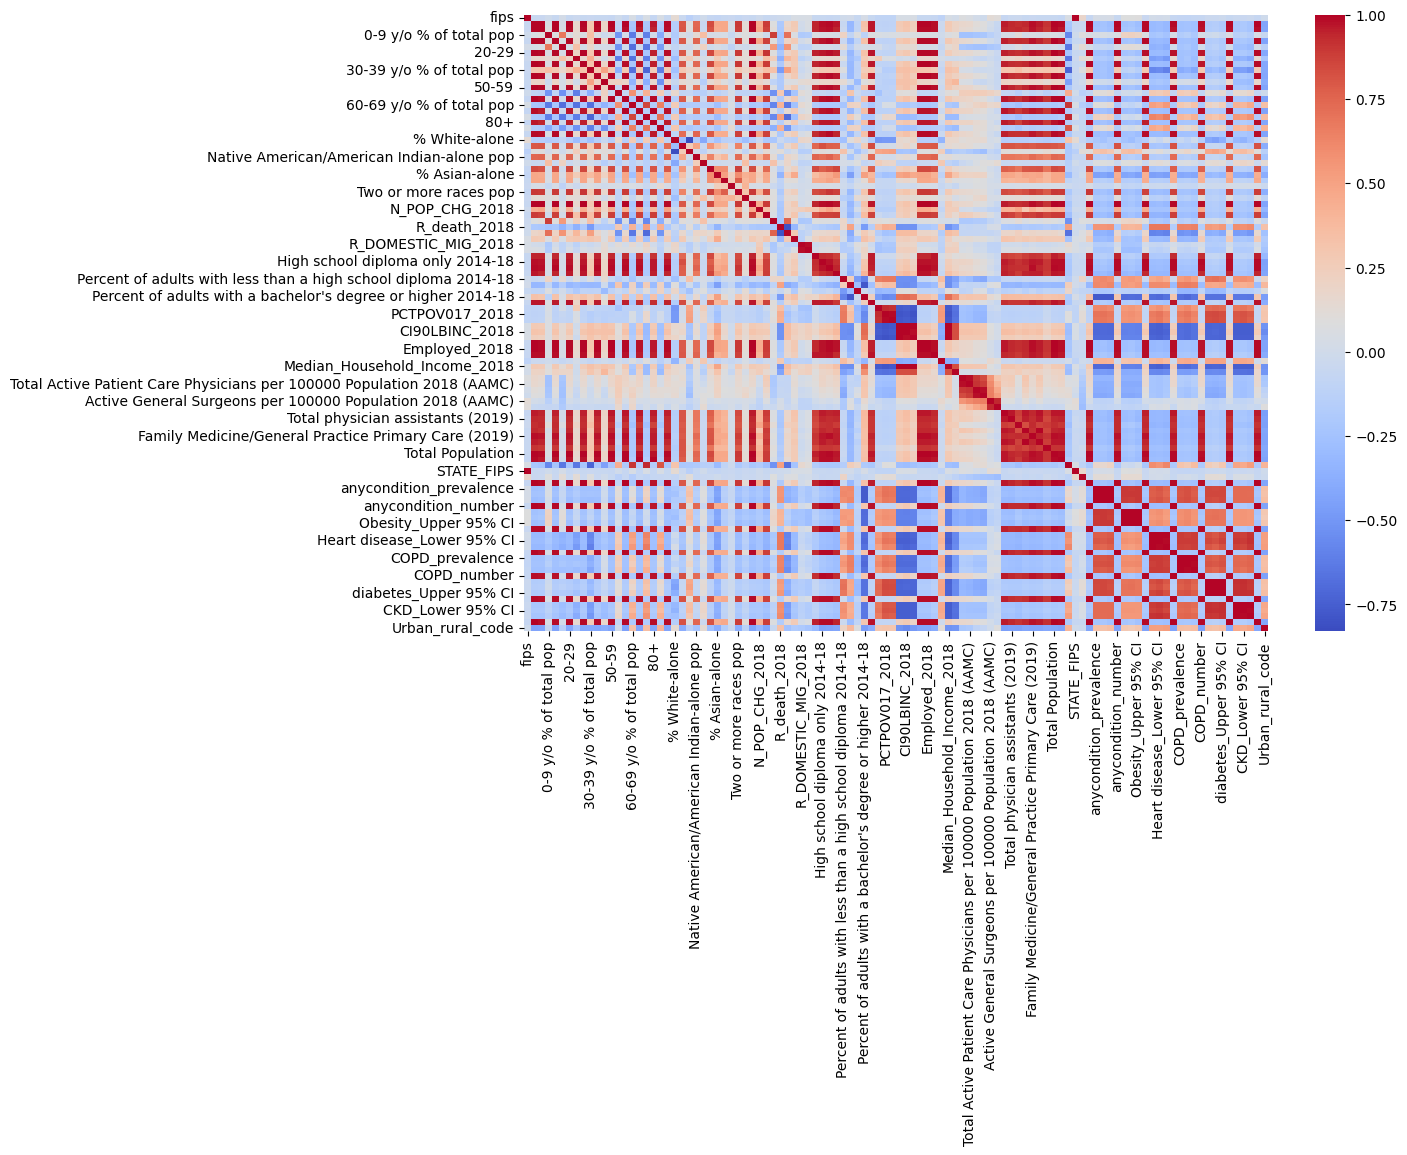

KeyError: "['HeartDiseaseMortality'] not found in axis"

In [2]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Paso 3: Construcción de modelos

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

alphas = np.linspace(0.0, 20, 50)
r2_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(alphas, r2_scores)
plt.xlabel("Alpha")
plt.ylabel("R2")
plt.show()

#### Paso 4: Optimizacion

In [ ]:
lasso_cv = LassoCV(alphas=np.linspace(0.001, 20, 100), cv=5)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_

y_pred_opt = lasso_cv.predict(X_test_scaled)

r2_opt = r2_score(y_test, y_pred_opt)
mse_opt = mean_squared_error(y_test, y_pred_opt)

### Conclusion

La regresión lineal permite identificar la relación global entre variables socio demográficas y la mortalidad por enfermedades cardíacas. El modelo Lasso introduce regularización, reduciendo la complejidad del modelo y ayudando a controlar el sobreajuste. Al analizar la evolución del 𝑅^2
 frente a distintos valores de alpha, se observa cómo la penalización influye en el desempeño del modelo. Finalmente, la optimización mediante validación cruzada permite seleccionar el valor de alpha que ofrece el mejor equilibrio entre ajuste y generalización.